fMRI behavioral performance analysis of Learning Brain data
--------------------------------------------------------------

The code below allows to visualize and analize data from 6-week working memory training study. Participants were scanned four times while performing dual n-back (Jaeggi et al., 2018). 

Three performance measures were calculated: 

- accuracy
- d-prime (dprime)
- penallized reaction time (prt)

Karolina Finc | Centre for Modern Interdisciplinary Technologies

Last edited: 29.05.2017

In [16]:
# Loading packages
library(tidyverse)
library(broom)

# Setting working directory
setwd("~/Dropbox/GitHub/LearningBrain_analyses")

# Loading data
performance <- read.csv("data/LB_fmri_behaviour_tidy.csv")
performance$session <- as.factor(performance$session)

# Checking data
glimpse(performance)
summary(performance)

Observations: 736
Variables: 9
$ sub      <fct> sub-01, sub-01, sub-01, sub-01, sub-01, sub-01, sub-01, su...
$ session  <fct> 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2...
$ n        <int> 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2...
$ modality <fct> audio, audio, audio, audio, audio, audio, audio, audio, au...
$ prt      <dbl> 1.1839700, 1.1663533, 1.0810033, 1.2020800, 1.1474633, 1.1...
$ dprime   <dbl> 4.040271, 3.475674, 4.137920, 3.409597, 3.202374, 3.535203...
$ accuracy <dbl> 90.23333, 82.25000, 88.25000, 81.25000, 86.23333, 86.24167...
$ sex      <fct> Female, Female, Female, Female, Female, Female, Female, Fe...
$ group    <fct> Control, Control, Control, Control, Control, Control, Cont...


      sub      session       n          modality        prt        
 sub-01 : 16   1:184   Min.   :1.0   audio  :368   Min.   :0.5096  
 sub-02 : 16   2:184   1st Qu.:1.0   spatial:368   1st Qu.:0.9782  
 sub-04 : 16   3:184   Median :1.5                 Median :1.1824  
 sub-05 : 16   4:184   Mean   :1.5                 Mean   :1.1729  
 sub-06 : 16           3rd Qu.:2.0                 3rd Qu.:1.3536  
 sub-07 : 16           Max.   :2.0                 Max.   :1.9649  
 (Other):640                                                       
     dprime           accuracy         sex               group    
 Min.   :0.09213   Min.   :49.13   Female:384   Control     :368  
 1st Qu.:2.67554   1st Qu.:86.24   Male  :352   Experimental:368  
 Median :3.25397   Median :88.24                                  
 Mean   :3.19157   Mean   :87.59                                  
 3rd Qu.:3.82074   3rd Qu.:89.25                                  
 Max.   :4.66723   Max.   :90.25                      

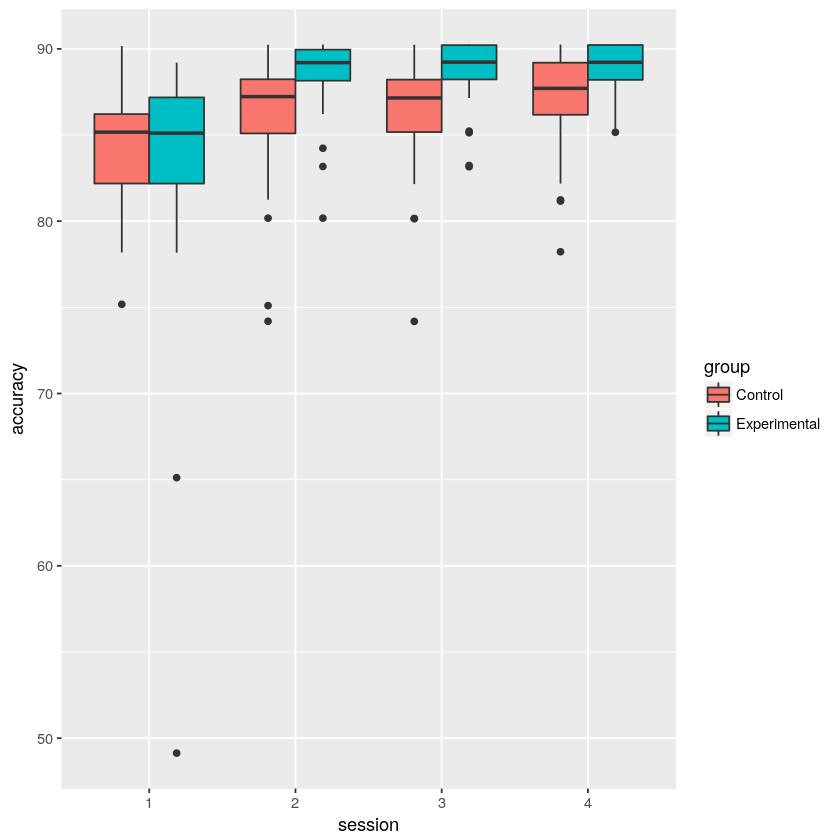

In [21]:
performance %>% group_by(group) %>% filter(n == 2) %>% ggplot(aes(session,accuracy, fill = group)) +
    geom_boxplot() # +
    #facet_wrap(~sub)

In [106]:
group_vector <- performance %>% group_by(sub, group) %>% summarize (x = mean(prt)) %>% select(sub, group)
group_vector

sub,group
sub-01,Control
sub-02,Control
sub-04,Control
sub-05,Experimental
sub-06,Experimental
sub-07,Experimental
sub-08,Control
sub-10,Control
sub-11,Experimental
sub-12,Control


In [55]:
# 1-back performance only (mean audio and spatial)
p1 <- performance %>% group_by(sub, group, session) %>% filter(n == 1) %>% summarize (prt = mean(prt), accuracy = mean(accuracy), dprime = mean(dprime))

# 2-back performance only (mean audio and spatial)
p2 <- performance %>% group_by(sub, group, session) %>% filter(n == 2) %>% summarize (prt = mean(prt), accuracy = mean(accuracy), dprime = mean(dprime))

# subtracting 1-back from 2-back
p3 <- p1[, 4:6] - p2[, 4:6]

# mearging with sub, session, group columns
performance_diff <- data.frame(p1[, 1:3], p3[,1:3])
performance_diff


sub,group,session,prt,accuracy,dprime
sub-01,Control,1,-0.27395000,6.50416667,0.97524649
sub-01,Control,2,-0.20018500,3.49166667,0.24440747
sub-01,Control,3,0.10792000,-0.51666667,-0.47699886
sub-01,Control,4,-0.05593833,-1.01666667,-0.52210362
sub-02,Control,1,-0.40573500,0.57083333,1.39782638
sub-02,Control,2,-0.07909500,0.50416667,0.34204904
sub-02,Control,3,-0.25015667,0.52500000,0.61031289
sub-02,Control,4,-0.19612500,-1.00000000,0.09689491
sub-04,Control,1,-0.31573333,3.07916667,1.64276674
sub-04,Control,2,-0.42434167,3.05000000,1.46081650


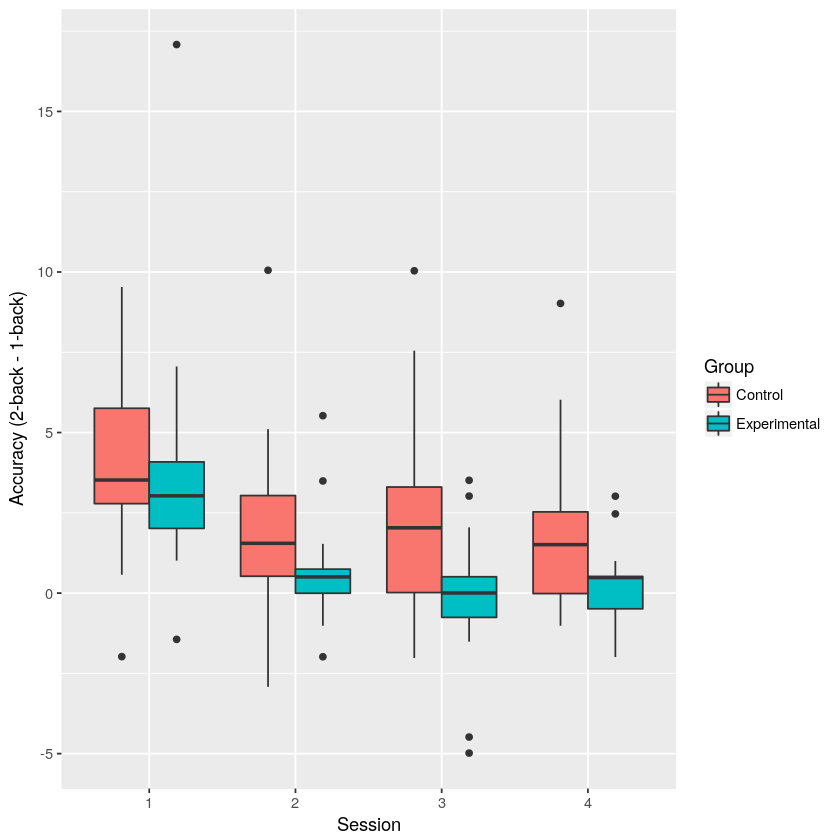

In [71]:
performance_diff %>% ggplot(aes(session, accuracy, fill = group)) +
    geom_boxplot() + 
    ylab("Accuracy (2-back - 1-back)") +
    xlab("Session") +
    guides(fill = guide_legend(title = "Group"))

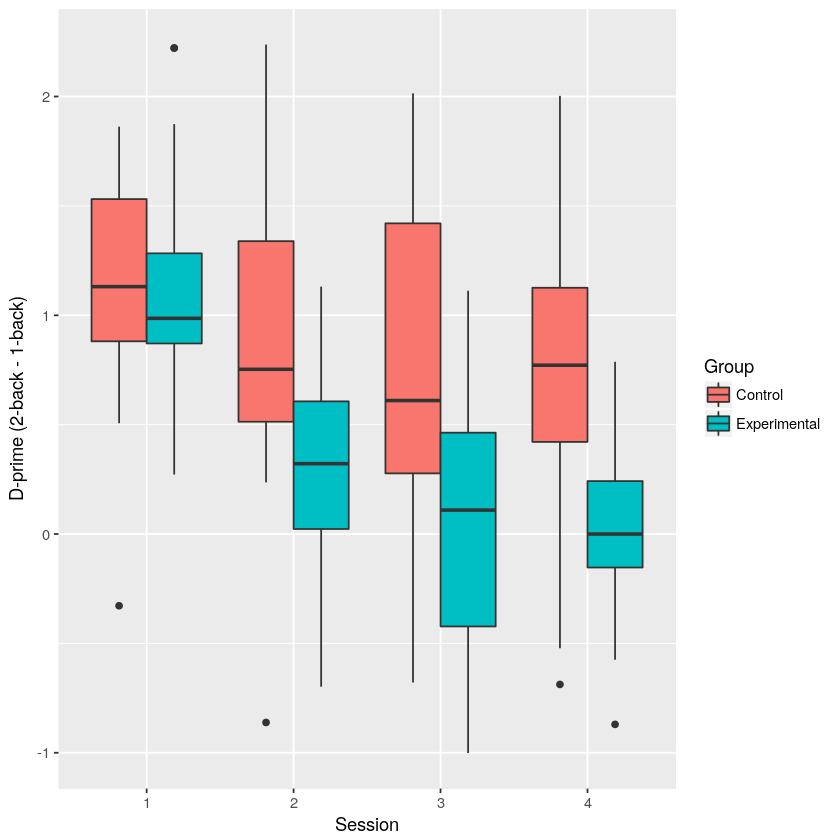

In [72]:
performance_diff %>% ggplot(aes(session, dprime, fill = group)) +
    geom_boxplot() +
    ylab("D-prime (2-back - 1-back)") +
    xlab("Session") +
    guides(fill = guide_legend(title = "Group"))

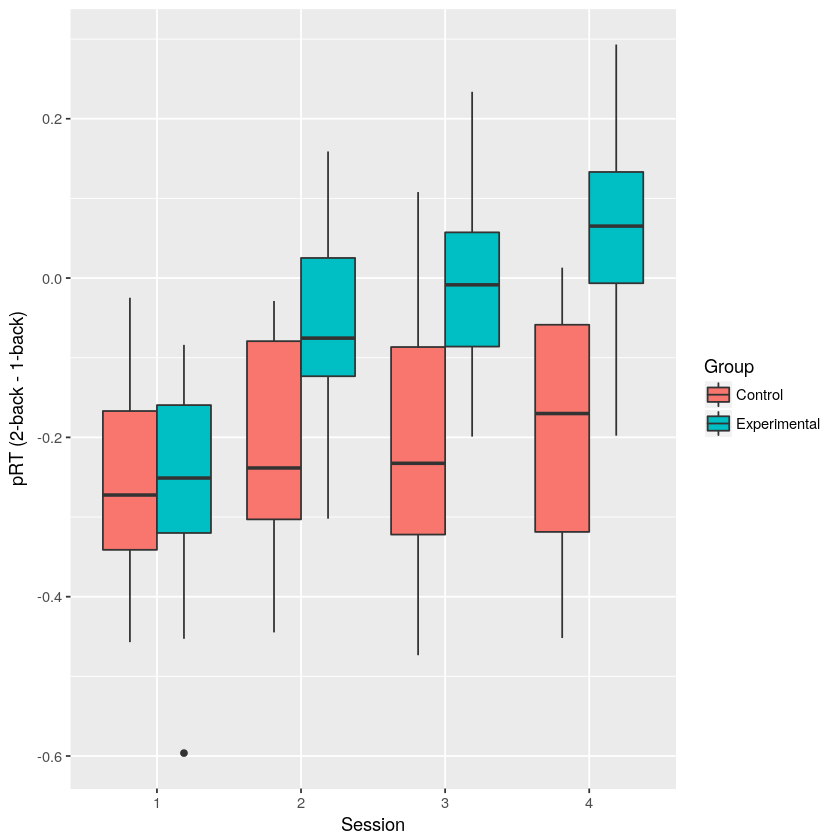

In [73]:
performance_diff %>%  ggplot(aes(session, prt, fill = group)) +
    geom_boxplot() +
    ylab("pRT (2-back - 1-back)") +
    xlab("Session") +
    guides(fill = guide_legend(title = "Group"))
    


In [96]:
performance_diff$session <- as.numeric(performance_diff$session)

performance_lm <- performance_diff %>%
    nest(-sub) %>% mutate(model = map(data, ~ lm(prt ~ session, data = .))) %>%
    mutate(tidied = map(model, tidy)) %>% 
    unnest(tidied)

head(performance_lm)


sub,term,estimate,std.error,statistic,p.value
sub-01,(Intercept),-0.34607333,0.171156578,-2.0219692,0.1805463468
sub-01,session,0.09621400,0.062497546,1.5394845,0.2635657574
sub-02,(Intercept),-0.34722000,0.183099269,-1.8963484,0.1983700253
sub-02,session,0.04577683,0.066858400,0.6846834,0.5642397823
sub-04,(Intercept),-0.44132333,0.179250828,-2.4620435,0.1328713594
sub-04,session,0.03897483,0.065453148,0.5954616,0.6119412209
sub-05,(Intercept),-0.02078250,0.167209797,-0.1242900,0.9124511852
sub-05,session,-0.01643033,0.061056385,-0.2691010,0.8130709119
sub-06,(Intercept),-0.73196083,0.241415663,-3.0319525,0.0937369678
sub-06,session,0.26815417,0.088152536,3.0419337,0.0932060276


Joining, by = "sub"


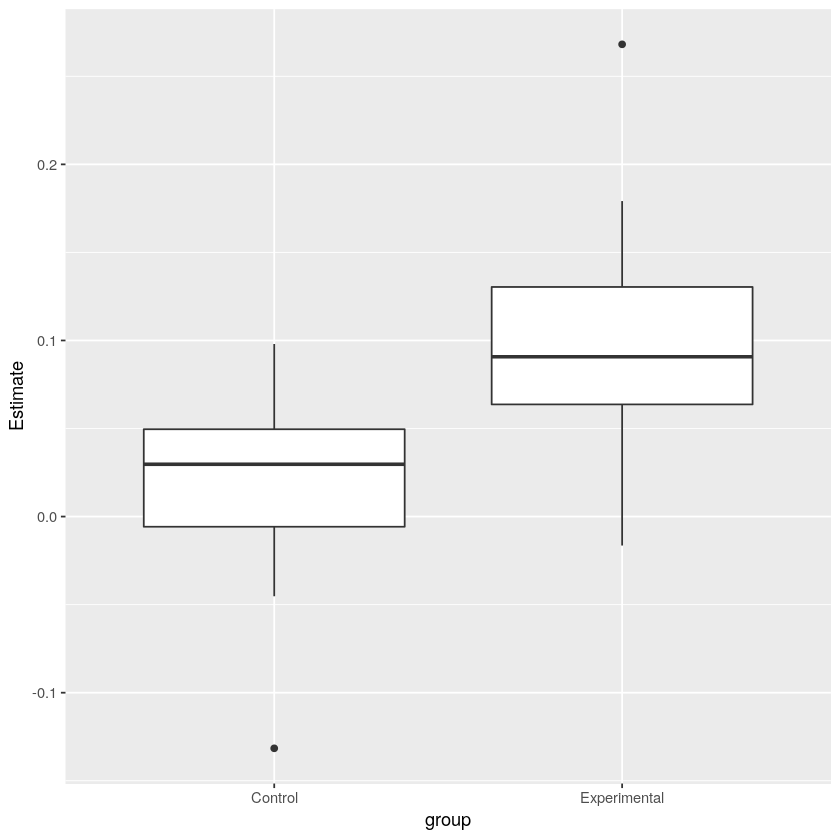

In [109]:
# Selecting rows with linear regression estimates
performance_slope  <- performance_lm %>% filter(term == "session") %>% 
    rename(Estimate = estimate) %>%
    select(sub, Estimate)

performance_slope <- left_join(performance_slope, group_vector) 

ggplot(performance_slope, aes(group, Estimate)) + 
    geom_boxplot()

In [118]:
training_summary <- read.csv("data/LB_training_summary.csv")

performance_global <- left_join(performance_slope, training_summary)
performance_global


Joining, by = "sub"
Warning message:
“Column `sub` joining factors with different levels, coercing to character vector”

sub,Estimate,group,nback_mean_estimate,nback_max_estimate,nback_baseline,nback_max_level
sub-01,0.096214000,Control,NA,NA,NA,NA
sub-02,0.045776833,Control,NA,NA,NA,NA
sub-04,0.038974833,Control,NA,NA,NA,NA
sub-05,-0.016430333,Experimental,0.084416925,0.118679051,2.05,6
sub-06,0.268154167,Experimental,0.106656347,0.169246646,2.10,7
sub-07,0.124309000,Experimental,0.003973168,0.033023736,2.30,5
sub-08,-0.131592667,Control,NA,NA,NA,NA
sub-10,0.031744333,Control,NA,NA,NA,NA
sub-11,0.179143667,Experimental,0.112074303,0.137254902,2.00,5
sub-12,0.086507833,Control,NA,NA,NA,NA


ERROR: Error: `group` (`group = "Experimental"`) must not be named, do you need `==`?



	Pearson's product-moment correlation

data:  performance_global$Estimate and performance_global$nback_max_level
t = 1.8331, df = 21, p-value = 0.081
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04817363  0.67956837
sample estimates:
      cor 
0.3714036 


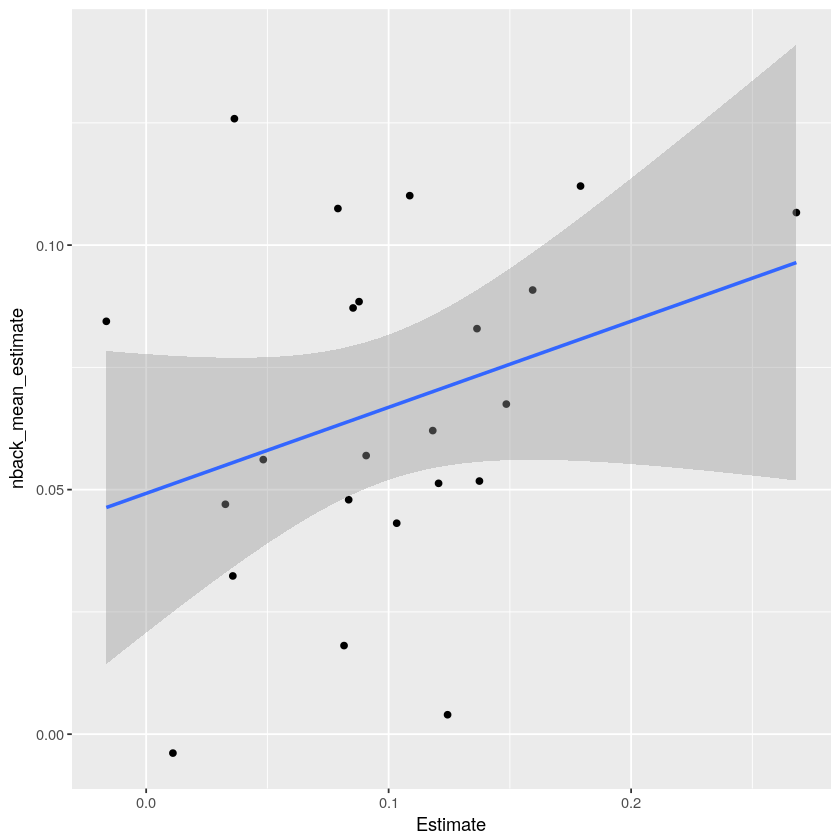

In [125]:
performance_global %>% filter (group == "Experimental") %>% ggplot(aes(Estimate, nback_mean_estimate)) +
    geom_point() + geom_smooth(method = "lm")

cor.test(performance_global$Estimate, performance_global$nback_mean_estimate)